In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import emcee, corner
import spiderman as sp
from batman import TransitModel

no stellar models provided, using blackbody approximation
amp: 181.000946129
no stellar models provided, using blackbody approximation
amp: 191.120272995


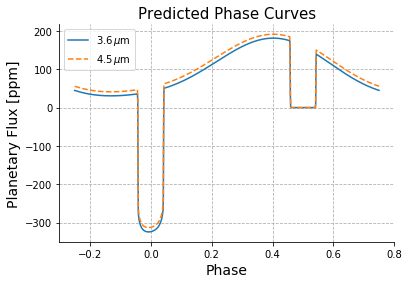

In [96]:
spider_params = sp.ModelParams(brightness_model="zhang")
spider_params.n_layers = 15

spider_params.t0 = 0               # Central time of PRIMARY transit [days]
spider_params.per = 0.736539       # Period [days]
spider_params.a_abs = 0.01544        # The absolute value of the semi-major axis [AU]
spider_params.inc = 83.3             # Inclination [degrees]
spider_params.ecc = 0.0              # Eccentricity
spider_params.w = 90                 # Argument of periastron
spider_params.rp = 0.0187            # Planet to star radius ratio
spider_params.a = 3.517              # Semi-major axis scaled by stellar radius
spider_params.p_u1 = 0               # Planetary limb darkening parameter
spider_params.p_u2 = 0               # Planetary limb darkening parameter

spider_params.xi = 0.8       # Ratio of radiative to advective timescale
spider_params.T_n = 1376     # Temperature of nightside
spider_params.delta_T = 4900 - spider_params.T_n  # Day-night temperature contrast
spider_params.T_s = 5100    # Temperature of the star

# spider_params.l1 = 3.2e-6       # The starting wavelength in meters
# spider_params.l2 = 3.8e-6       # The ending wavelength in meters
# spider_params.l1 = 4e-6       # The starting wavelength in meters
# spider_params.l2 = 5e-6       # The ending wavelength in meters
spider_params.limb_dark = 'quadratic'
spider_params.u = [0.0783, 0.1407]
spider_params.fp = 0
spider_params.t_secondary = 0

irac1 = [3.15e-6, 3.95e-6]
irac2 = [4e-6, 5e-6]
for bandpass, ls, label in zip([irac1, irac2], 
                                ['-', '--'], 
                                ['$3.6\,\mu$m', '$4.5\,\mu$m']):

    spider_params.l1 = bandpass[0]
    spider_params.l2 = bandpass[1]


    t = spider_params.t0 + np.linspace(-0.25 * spider_params.per, 0.75 * spider_params.per, 1000)

    lc = spider_params.lightcurve(t)

    m = TransitModel(spider_params, t)
    lc *= m.light_curve(spider_params)
    eclipse_min_flux = lc[int(3/4*len(t))]
    lc = 1e6 * (lc - eclipse_min_flux)

    print("amp:", lc.max())

    plt.plot(t / spider_params.per, lc, ls=ls, label=label)
for s in ['right', 'top']:
    plt.gca().spines[s].set_visible(False)
plt.legend()
plt.title('Predicted Phase Curves', fontsize=15)
plt.grid(ls='--')
plt.xlabel('Phase', fontsize=14)
plt.ylabel('Planetary Flux [ppm]', fontsize=14)
plt.savefig('plots/predicted_flux_spiderman.pdf', bbox_inches='tight', dpi=300)
# plt.show()

no stellar models provided, using blackbody approximation
no stellar models provided, using blackbody approximation
depth: 172.449965702
no stellar models provided, using blackbody approximation
no stellar models provided, using blackbody approximation
depth: 46.0417867383


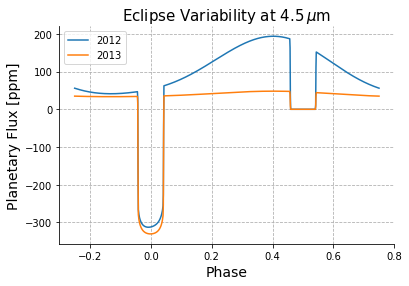

In [110]:
delta_Ts = [4950 - spider_params.T_n, 1800 - spider_params.T_n]

fig, ax = plt.subplots(1, 1, sharey=True)


spider_params.l1 = irac[0]
spider_params.l2 = irac[1]
for dT, label in zip(delta_Ts, ['2012', '2013']):
    spider_params.delta_T = dT

    lc = spider_params.lightcurve(t)
    print('depth:', 1e6*spider_params.eclipse_depth())
    m = TransitModel(spider_params, t)
    lc *= m.light_curve(spider_params)
    eclipse_min_flux = lc[int(3/4*len(t))]
    lc = 1e6 * (lc - eclipse_min_flux)

#     print("amp:", lc.max())

    ax.plot(t / spider_params.per, lc, label=label)
ax.legend()

for s in ['right', 'top']:
    ax.spines[s].set_visible(False)
ax.set_title('Eclipse Variability at {0}'.format(channel), fontsize=15)
ax.grid(ls='--')
ax.set_xlabel('Phase', fontsize=14)
ax.set_ylabel('Planetary Flux [ppm]', fontsize=14)
#plt.savefig('plots/predicted_variability_spiderman.pdf', bbox_inches='tight', dpi=300)
plt.show()

no stellar models provided, using blackbody approximation
no stellar models provided, using blackbody approximation
depth: 162.070016194
no stellar models provided, using blackbody approximation
no stellar models provided, using blackbody approximation
depth: 34.9960022348
no stellar models provided, using blackbody approximation
no stellar models provided, using blackbody approximation
depth: 172.449965702
no stellar models provided, using blackbody approximation
no stellar models provided, using blackbody approximation
depth: 46.0417867383


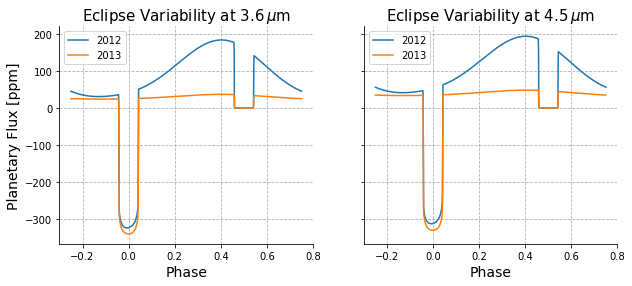

In [107]:
delta_Ts = [4950 - spider_params.T_n, 1800 - spider_params.T_n]

fig, ax = plt.subplots(1, 2, figsize=(10, 4), sharey=True)

for i, irac, channel in zip(range(2), 
                          [irac1, irac2], 
                          ['$3.6\,\mu$m', '$4.5\,\mu$m']):
    spider_params.l1 = irac[0]
    spider_params.l2 = irac[1]
    for dT, label in zip(delta_Ts, ['2012', '2013']):
        spider_params.delta_T = dT

        lc = spider_params.lightcurve(t)
        print('depth:', 1e6*spider_params.eclipse_depth())
        m = TransitModel(spider_params, t)
        lc *= m.light_curve(spider_params)
        eclipse_min_flux = lc[int(3/4*len(t))]
        lc = 1e6 * (lc - eclipse_min_flux)

    #     print("amp:", lc.max())

        ax[i].plot(t / spider_params.per, lc, label=label)
    ax[i].legend()

    for s in ['right', 'top']:
        ax[i].spines[s].set_visible(False)
    ax[i].set_title('Eclipse Variability at {0}'.format(channel), fontsize=15)
    ax[i].grid(ls='--')
    ax[i].set_xlabel('Phase', fontsize=14)
    if i == 0:
        ax[i].set_ylabel('Planetary Flux [ppm]', fontsize=14)
#plt.savefig('plots/predicted_variability_spiderman.pdf', bbox_inches='tight', dpi=300)
plt.show()

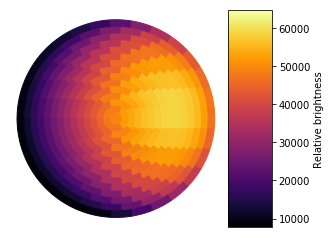

In [77]:
spider_params.plot_planet(spider_params.per/2)
plt.savefig('plots/hotspot_spiderman.pdf', bbox_inches='tight')